In [1]:
# Name: Muhammad Rayyan Khan
# Roll Number: 21B-209-SE
# Section: SE-A

# Question 1

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def get_dataset():
    X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
    return X, y

In [4]:
def get_models():
    models = []
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('tree', DecisionTreeClassifier()))
    models.append(('nb', GaussianNB()))
    models.append(('svm', SVC(probability=True)))
    return models

In [5]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [6]:
X, y = get_dataset()
models = get_models()

In [7]:
results, names = [], []
for name, model in models:
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f">{name}: {np.mean(scores):.3f} ({np.std(scores):.3f})")

>lr: 0.856 (0.014)
>knn: 0.953 (0.008)
>tree: 0.866 (0.014)
>nb: 0.847 (0.021)
>svm: 0.953 (0.010)


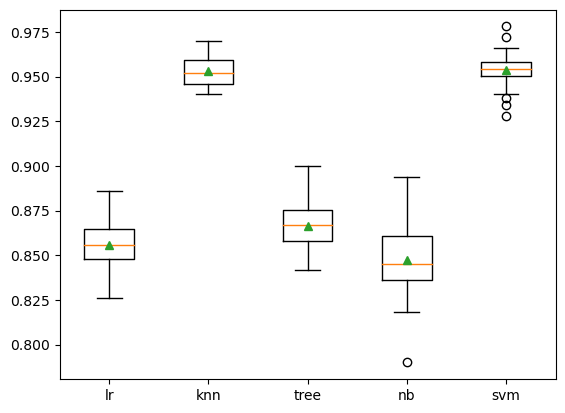

In [8]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [9]:
ensemble = VotingClassifier(estimators=models, voting='soft')

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [12]:
print(f"Mean Accuracy: {np.mean(scores):.3f} ({np.std(scores):.3f})")

Mean Accuracy: 0.929 (0.012)


# Question 2

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import numpy as np

In [14]:
def load_diabetes_data():
    data = load_diabetes()
    X, y = data.data, data.target
    return X, y

In [15]:
def evaluate_models(X, y):
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVM', SVC(probability=True))
    ]
    results = []
    for name, model in models:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        results.append((name, np.mean(scores), np.std(scores)))
        print(f"{name}: Mean Accuracy: {np.mean(scores):.3f}, Std: {np.std(scores):.3f}")
    return results

In [16]:
def create_voting_ensemble():
    models = [
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('tree', DecisionTreeClassifier()),
        ('nb', GaussianNB()),
        ('svm', SVC(probability=True))
    ]
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

In [17]:
def evaluate_ensemble(X, y, ensemble):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f"Ensemble: Mean Accuracy: {np.mean(scores):.3f}, Std: {np.std(scores):.3f}")
    return np.mean(scores), np.std(scores)

In [18]:
def select_best_model(results, ensemble_score):
    best_model = max(results, key=lambda x: x[1])
    if ensemble_score[0] > best_model[1]:
        print(f"Best model: Ensemble (Mean Accuracy: {ensemble_score[0]:.3f}, Std: {ensemble_score[1]:.3f})")
    else:
        print(f"Best model: {best_model[0]} (Mean Accuracy: {best_model[1]:.3f}, Std: {best_model[2]:.3f})")

In [19]:
def main():
    X, y = load_diabetes_data()
    results = evaluate_models(X, y)
    
    ensemble = create_voting_ensemble() 
    ensemble_score = evaluate_ensemble(X, y, ensemble)
    
    select_best_model(results, ensemble_score)

if __name__ == "__main__":
    main()

C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression: Mean Accuracy: 0.014, Std: 0.004
KNN: Mean Accuracy: 0.000, Std: 0.000
Decision Tree: Mean Accuracy: 0.002, Std: 0.004
Naive Bayes: Mean Accuracy: 0.005, Std: 0.006


C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM: Mean Accuracy: 0.018, Std: 0.005


C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Ensemble: Mean Accuracy: 0.007, Std: 0.009
Best model: SVM (Mean Accuracy: 0.018, Std: 0.005)


# Homework - Project Assignment - 1

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
df = pd.read_excel('seer_dataset.xlsx')

In [22]:
print(df.columns)

Index(['November 2023 Data Submission Research Plus Data Items', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')


In [23]:
import pandas as pd

data = pd.read_excel("seer_dataset.xlsx", skiprows=1, header=None)
column_names = ['Name', 'Research', 'Research Limited-Field', 'Research Plus Limited-Field', 
                'Available in Case Listing', 'NAACCR Item #', 'Description', 'Category name']
data.columns = column_names

print(data.head())

print(data['Category name'].unique())

  Name                                           Research  \
0  NaN  Item # refers to the NAACCR item number - see ...   
1  NaN                          CS= Collaborative Staging   
2  NaN                         SSF = Site-specific Factor   
3  NaN  Limited-Field refers to SEER 22 databases that...   
4  NaN  * Indicates that a field is available in the S...   

  Research Limited-Field Research Plus Limited-Field  \
0                    NaN                         NaN   
1                    NaN                         NaN   
2                    NaN                         NaN   
3                    NaN                         NaN   
4                    NaN                         NaN   

  Available in Case Listing NAACCR Item # Description Category name  
0                       NaN           NaN         NaN           NaN  
1                       NaN           NaN         NaN           NaN  
2                       NaN           NaN         NaN           NaN  
3               

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('tree', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('svm', SVC(probability=True))
]

In [26]:
for name, model in models:
    model.fit(X_train, y_train)

In [27]:
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.3f}')

lr Accuracy: 0.861
knn Accuracy: 0.954
tree Accuracy: 0.858
nb Accuracy: 0.848
svm Accuracy: 0.949


In [28]:
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [29]:
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Method Accuracy: {accuracy_ensemble:.3f}')

Ensemble Method Accuracy: 0.932


In [39]:
# Train a decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# Get feature importances
feature_importances = dt_model.feature_importances_

In [40]:
# Redundant Feature Detection:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate pairwise feature correlations
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Analyze the correlation matrix to identify redundant features
# You can examine the correlation values and decide a threshold above which features are considered redundant


Empty DataFrame
Columns: []
Index: []


In [41]:
# fEATURE INTERACTION ANALYSIS
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

In [42]:
# PREDICTIVE FEATURE IDENTIFICATION
from sklearn.feature_selection import RFE
lr_model = LogisticRegression()
rfe = RFE(lr_model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

In [43]:
# BAGGING AND BOOSTING
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()